# Info
Purpose:

    Exploration of MASTER data for evidence of potassium emission lines in active fire regions

Input:

    arguments

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - Sp_parameters
    - write_utils
    - path_utils
    - hdf5storage
    - scipy

Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - ...

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2022-01-19
    Modified:


# Prepare python environment

In [3]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import os


In [13]:
name = 'KFire'
vv = 'v1'
fp = getpath(name)

Return path named:  KFire /data/sam/KFire/


# Load files

In [37]:
os.listdir(fp+'MASTER/')

['MASTERL1B_1662900_14_20160617_2253_2312_V01.zip',
 'MASTERL1B_1662900_13_20160617_2228_2244_V01.hdf',
 'MASTERL1B_2190500_05_20201013_1901_1924_V01.zip',
 'MASTERL1B_2190500_02_20201013_1734_1759_V01.hdf',
 'MASTERL1B_2190500_03_20201013_1804_1829_V01.zip',
 'MASTERL1B_2190500_08_20201013_2022_2043_V01.zip',
 'MASTERL1B_2190500_05_20201013_1901_1924_V01.hdf',
 'MASTERL1B_1662900_11_20160617_2107_2124_V01.hdf',
 'MASTERL1B_2190500_06_20201013_1929_1951_V01.hdf',
 'MASTERL1B_2190500_01_20201013_1705_1729_V01.zip',
 'MASTERL1B_2190500_01_20201013_1705_1729_V01.hdf',
 'MASTERL1B_1662900_11_20160617_2107_2124_V01.zip',
 'MASTERL1B_2190500_04_20201013_1834_1857_V01.hdf',
 'MASTERL1B_2190500_08_20201013_2022_2043_V01.hdf',
 'MASTERL1B_2190500_06_20201013_1929_1951_V01.zip',
 'MASTERL1B_1662900_12_20160617_2204_2219_V01.zip',
 'MASTERL1B_2190500_02_20201013_1734_1759_V01.zip',
 'MASTERL1B_2190500_03_20201013_1804_1829_V01.hdf',
 'MASTERL1B_1662900_13_20160617_2228_2244_V01.zip',
 'MASTERL1B_

## 2020 western diversity temp

In [22]:
hdf,hdf_dict = lu.load_hdf(fp+'MASTER/MASTERL1B_2190500_03_20201013_1804_1829_V01.hdf',all_values=True,i_subdata=0)

Outputting the Data subdatasets:
0: [153x104] DataSetHeader (8-bit character)
1: [9261x50] AnalogGain (16-bit integer)
2: [9261x50] AnalogOffset (16-bit integer)
3: [9261x50] BlackBody1Counts (16-bit unsigned integer)
4: [9261x50] BlackBody2Counts (16-bit unsigned integer)
5: [9261x50] Head1Counts (16-bit unsigned integer)
6: [9261x50] Head2Counts (16-bit unsigned integer)
7: [9261x50] CalibrationSlope (32-bit floating-point)
8: [9261x50] CalibrationIntercept (32-bit floating-point)
9: [9261x716] PixelLatitude (64-bit floating-point)
10: [9261x716] PixelLongitude (64-bit floating-point)
11: [9261x716] PixelElevation (64-bit floating-point)
12: [9261x716] SensorZenithAngle (32-bit floating-point)
13: [9261x716] SensorAzimuthAngle (32-bit floating-point)
14: [9261x716] SolarZenithAngle (32-bit floating-point)
15: [9261x716] SolarAzimuthAngle (32-bit floating-point)
16: [9261x50x716] CalibratedData (16-bit integer)
Running through data values: [########################################]100

In [25]:
hdf_dict['CalibratedData']

{'AircraftPlatform': 'NASA ER2 (809)',
 'AltitudeCode': 'Global Pos (GPS)',
 'begin_date': '20201013 180423',
 'CalibrationName': '20_WDTSFall_061720_111220',
 'CalibrationVersion': 'Version 1.0 Calibration',
 'CompletionDate': '18-Nov-2020 10:52:57',
 'CreationDate': '18-Nov-2020 10:52:44',
 'DataUsersGuideSource': 'http://mas.arc.nasa.gov/',
 'data_quality': 'Good',
 'data_set': 'MASTER WDTS_Fall20',
 'Datum': 'WGS84/NAD83',
 'day_night_flag': 'D',
 'end_date': '20201013 182904',
 'ExperimentName': 'WDTS_Fall20',
 'FlightComment': 'San Francisco Bay Area Box / Creek Fire; LN2 loss affected TIR bands at 2245Z',
 'FlightDate': '13 Oct 2020',
 'FlightLineComment': 'SE to NW; Clear, sun glint',
 'FlightLineNumber': '3',
 'FlightNumber': '21-905-00',
 'GeographicArea': 'S.F. Bay Area Box (Line 3)',
 'GeoLocationProcess': 'MasterGeo (3.0-D)',
 'granule_size': '938272996',
 'granule_version': '1',
 'lat_LL': '38.92932892',
 'lat_LR': '38.75053406',
 'lat_UL': '36.53391647',
 'lat_UR': '36.3

## 2016 flights

In [38]:
hdf2,hdf2_dict = lu.load_hdf(fp+'MASTER/MASTERL1B_1662900_12_20160617_2204_2219_V01.hdf',all_values=True,i_subdata=0)

Outputting the Data subdatasets:
0: [158x88] DataSetHeader (8-bit character)
1: [5340x50] AnalogGain (16-bit integer)
2: [5340x50] AnalogOffset (16-bit integer)
3: [5340x50] BlackBody1Counts (16-bit unsigned integer)
4: [5340x50] BlackBody2Counts (16-bit unsigned integer)
5: [5340x50] Head1Counts (16-bit unsigned integer)
6: [5340x50] Head2Counts (16-bit unsigned integer)
7: [5340x50] CalibrationSlope (32-bit floating-point)
8: [5340x50] CalibrationIntercept (32-bit floating-point)
9: [5340x716] PixelLatitude (64-bit floating-point)
10: [5340x716] PixelLongitude (64-bit floating-point)
11: [5340x716] PixelElevation (64-bit floating-point)
12: [5340x716] SensorZenithAngle (32-bit floating-point)
13: [5340x716] SensorAzimuthAngle (32-bit floating-point)
14: [5340x716] SolarZenithAngle (32-bit floating-point)
15: [5340x716] SolarAzimuthAngle (32-bit floating-point)
16: [5340x50x716] CalibratedData (16-bit integer)
Running through data values: [########################################]100%

In [39]:
hdf2_dict['DataSetHeader']

{'AircraftPlatform': 'NASA ER2 (806)',
 'AltitudeCode': 'Global POS (GPS)',
 'begin_date': '20160617 220417',
 'CalibrationName': '16_Summer_052716-071416_052316',
 'CalibrationVersion': 'Version 1.0 Calibration',
 'CompletionDate': '12-Aug-2016 16:45:53',
 'CreationDate': '12-Aug-2016 16:44:28',
 'DataUsersGuideSource': 'http://mas.arc.nasa.gov/',
 'data_quality': 'Good',
 'data_set': 'MASTER HyspIRI_2016',
 'Datum': 'WGS84/NAD83',
 'day_night_flag': 'D',
 'end_date': '20160617 221912',
 'ExperimentName': 'HyspIRI_2016',
 'FlightComment': 'Combined HyspIRI / SARP mission',
 'FlightDate': '17 Jun 2016',
 'FlightLineComment': 'SARP; S  fire',
 'FlightLineNumber': '12',
 'FlightNumber': '16-629-00',
 'GeographicArea': 'Santa Barbara',
 'GeoLocationProcess': 'MasterGeo (3.0-D)',
 'granule_size': '541032128',
 'granule_version': '1',
 'lat_LL': '34.27162933',
 'lat_LR': '34.24255753',
 'lat_UL': '34.89389801',
 'lat_UR': '34.86492538',
 'LocationCode': 'Global POS (GPS)',
 'lon_LL': '-120.

# Plot out data

## 2020 data

In [26]:
hdf['CalibratedData'].shape

(50, 9261, 716)

<IPython.core.display.Javascript object>


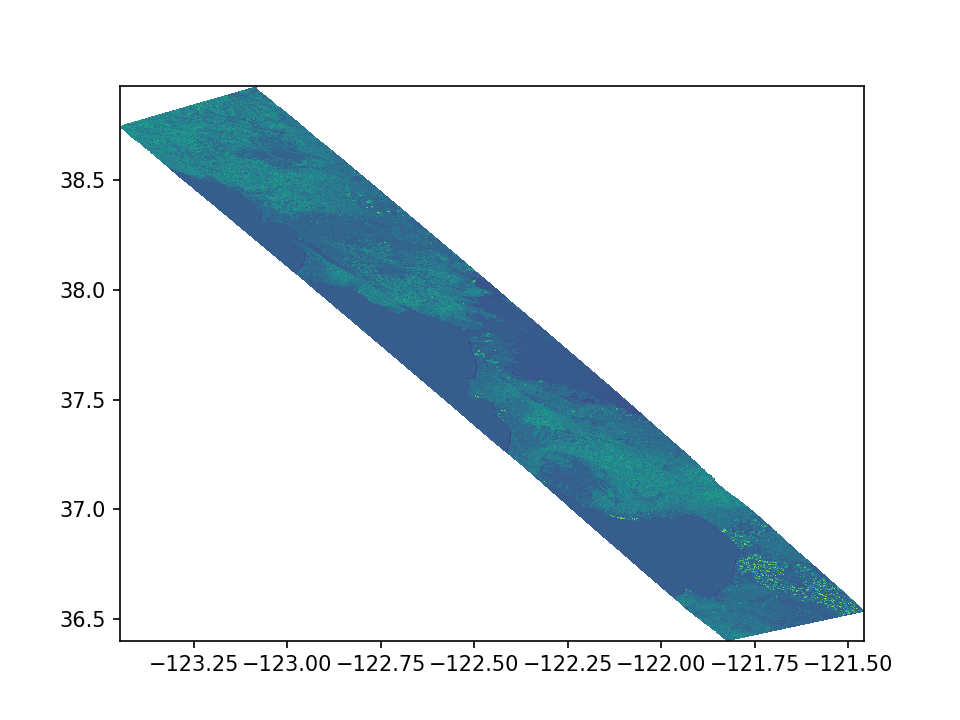

<ipython-input-28-9ddf681efb23>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(hdf['PixelLongitude'],hdf['PixelLatitude'],hdf['CalibratedData'][6,:,:]-hdf['CalibratedData'][5,:,:])


In [28]:
plt.figure()
plt.pcolor(hdf['PixelLongitude'],hdf['PixelLatitude'],hdf['CalibratedData'][6,:,:]-hdf['CalibratedData'][5,:,:])

<IPython.core.display.Javascript object>


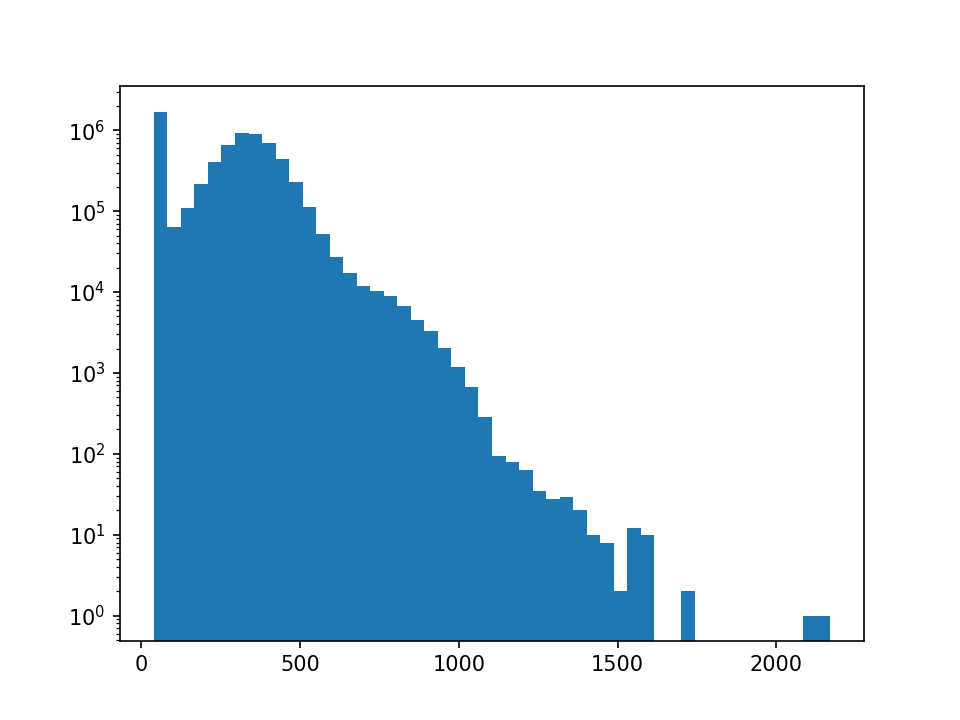

In [31]:
plt.figure()
plt.hist(hdf['CalibratedData'][6,:,:].flatten(),bins=50)
plt.yscale('log')

## 2016 data

In [34]:
hdf2['CalibratedData'].shape

(50, 6258, 716)

<IPython.core.display.Javascript object>


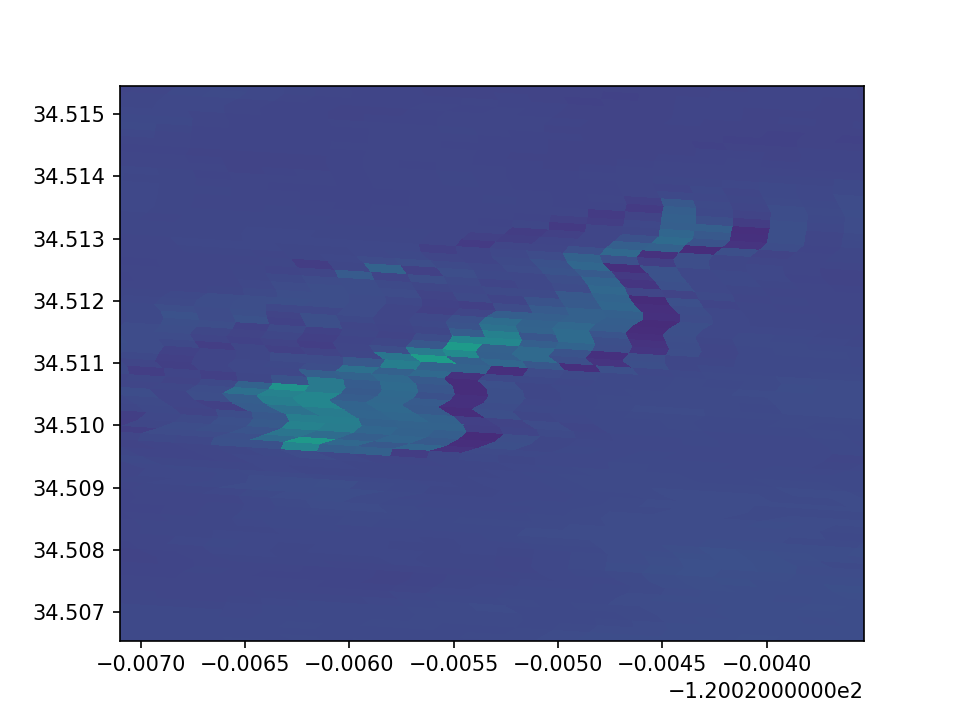

<ipython-input-51-12582e47757a>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(hdf2['PixelLongitude'],hdf2['PixelLatitude'],hdf2['CalibratedData'][6,:,:],picker=True,pickradius=5)


In [51]:
fig = plt.figure()
plt.pcolor(hdf2['PixelLongitude'],hdf2['PixelLatitude'],hdf2['CalibratedData'][6,:,:],picker=True,pickradius=5)
#text = plt.gca().text(0,0, "", va="bottom", ha="left")
#def onpick(event):
#    print('onpick:',event.ind)
#    text.set_text('onpick:',event.ind)
#    return True
#fig.canvas.mpl_connect('pick_event', onpick)
#plt.show()

<IPython.core.display.Javascript object>


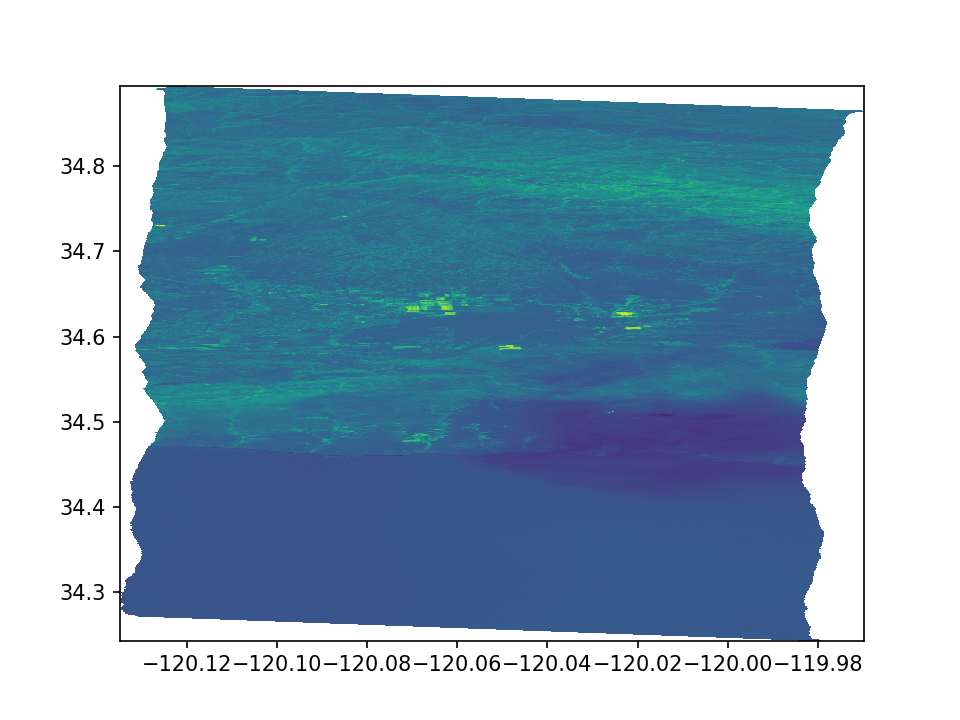

<ipython-input-40-56bc9d1ebb23>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(hdf2['PixelLongitude'],hdf2['PixelLatitude'],hdf2['CalibratedData'][6,:,:]-hdf2['CalibratedData'][5,:,:])


In [40]:
plt.figure()
plt.pcolor(hdf2['PixelLongitude'],hdf2['PixelLatitude'],hdf2['CalibratedData'][6,:,:]-hdf2['CalibratedData'][5,:,:])

<IPython.core.display.Javascript object>


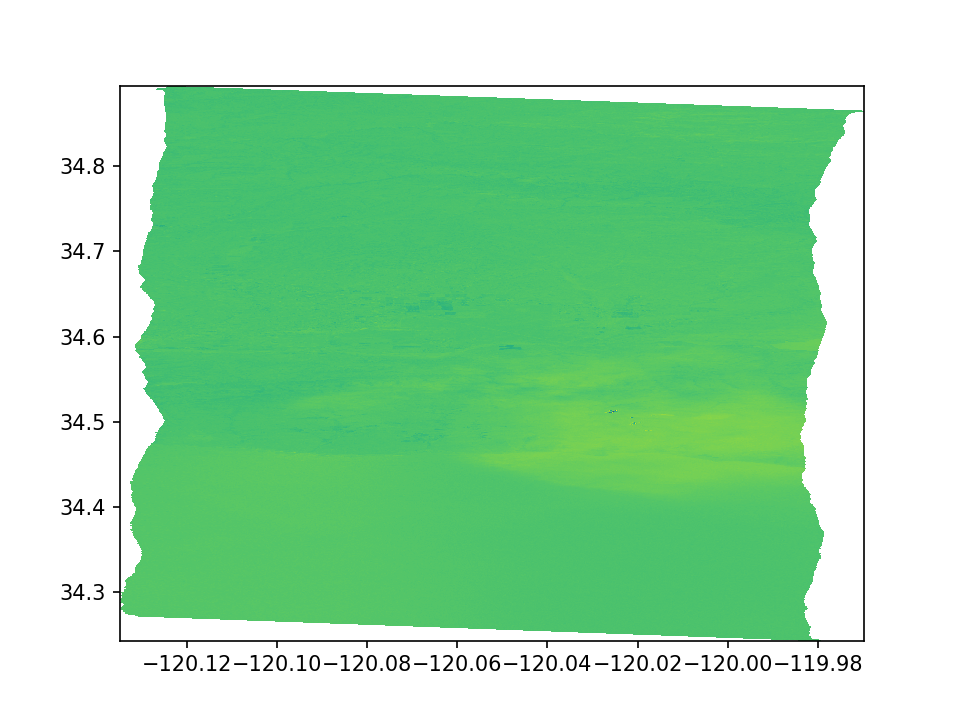

<ipython-input-42-52f2e8ae0aa7>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(hdf2['PixelLongitude'],hdf2['PixelLatitude'],hdf2['CalibratedData'][6,:,:]-hdf2['CalibratedData'][7,:,:])


In [42]:
plt.figure()
plt.pcolor(hdf2['PixelLongitude'],hdf2['PixelLatitude'],hdf2['CalibratedData'][6,:,:]-hdf2['CalibratedData'][7,:,:])
plt.colorbar()

<IPython.core.display.Javascript object>


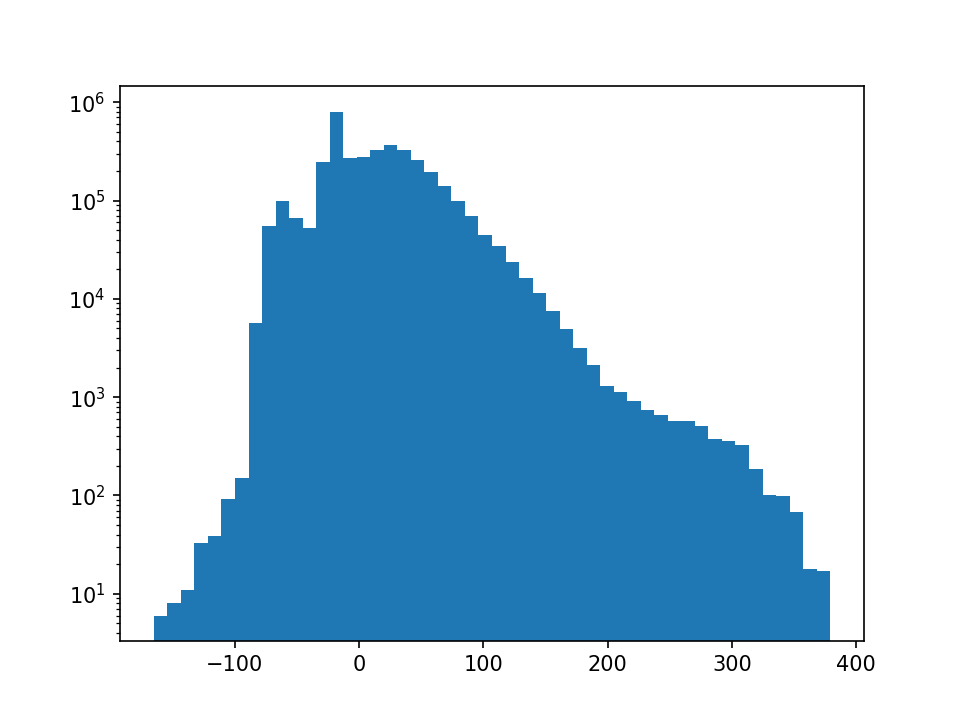

In [44]:
plt.figure()
plt.hist(hdf2['CalibratedData'][6,:,:].flatten()-hdf2['CalibratedData'][5,:,:].flatten(),bins=50)
plt.yscale('log')

<IPython.core.display.Javascript object>


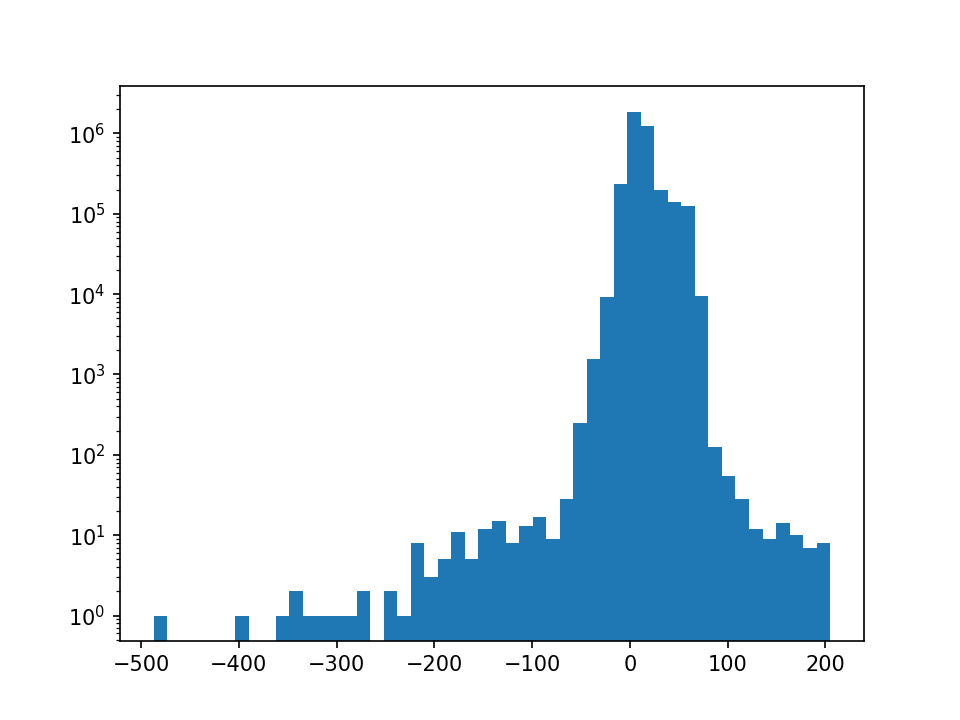

In [45]:
plt.figure()
plt.hist(hdf2['CalibratedData'][6,:,:].flatten()-hdf2['CalibratedData'][7,:,:].flatten(),bins=50)
plt.yscale('log')

## Plot out spectra

By looking at points on map that seem near the fire. for hdf file #12 

For 2016 hdf2 point:
 - lon: -120.025440
 - lat: 34.51126

In [52]:
lat_region = [34.507,34.515]
lon_region = [-120.02706,-120.02355]
lat_pnt = 34.51126
lon_pnt = -120.02544

In [56]:
i_pnt = np.unravel_index(np.argmin(pow(lon_pnt-hdf2['PixelLongitude'],2)+pow(lat_pnt-hdf2['PixelLatitude'],2)),hdf2['PixelLatitude'].shape)

In [57]:
i_pnt, hdf2['PixelLongitude'][i_pnt], hdf2['PixelLatitude'][i_pnt] 

((3110, 526), -120.02536227864037, 34.51129737562096)

In [59]:
i_rg = np.where((hdf2['PixelLongitude']>lon_region[0]) & (hdf2['PixelLongitude']<lon_region[1]) &
         (hdf2['PixelLatitude']>lat_region[0]) & (hdf2['PixelLatitude']<lat_region[1]))

In [62]:
hdf2.keys()

dict_keys(['DataSetHeader', 'AnalogGain', 'AnalogOffset', 'BlackBody1Counts', 'BlackBody2Counts', 'Head1Counts', 'Head2Counts', 'CalibrationSlope', 'CalibrationIntercept', 'PixelLatitude', 'PixelLongitude', 'PixelElevation', 'SensorZenithAngle', 'SensorAzimuthAngle', 'SolarZenithAngle', 'SolarAzimuthAngle', 'CalibratedData'])

In [201]:
wvl = np.array([0.466,0.506,0.546,0.586,0.660,0.716,0.756,0.804,0.872,0.912,0.952,1.6,1.656,1.712,1.766,1.818,1.876,1.924,1.974,
       2.074,2.158,2.206,2.256,2.316,2.384,4.0501,3.27,3.445,3.585,3.74,3.895,4.05,4.231,4.365,4.515,4.67,4.825,4.975,
       5.105,5.255,7.78,8.17,8.61,9.04,9.66,10.08,10.58,11.25,12.11,12.86])

In [202]:
isort = np.argsort(wvl)

In [203]:
isort

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 25, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [204]:
scale = [float(r) for r in hdf2_dict['CalibratedData']['scale_factor'].split(', ')]
rad = np.array([hdf2['CalibratedData'][i,:,:]*s for i,s in enumerate(scale)])

In [205]:
rad.shape

(50, 5340, 716)

In [98]:
import matplotlib.ticker as ticker

In [102]:
def myLogFormat(y,pos):
    # Find the number of decimal places required
    decimalplaces = 2 #int(np.maximum(-np.log10(y),0))     # =0 for numbers >=1
    # Insert that number into a format string
    formatstring = '{{:.{:1d}f}}'.format(decimalplaces)
    # Return the formatted tick label
    return formatstring.format(y)

<IPython.core.display.Javascript object>


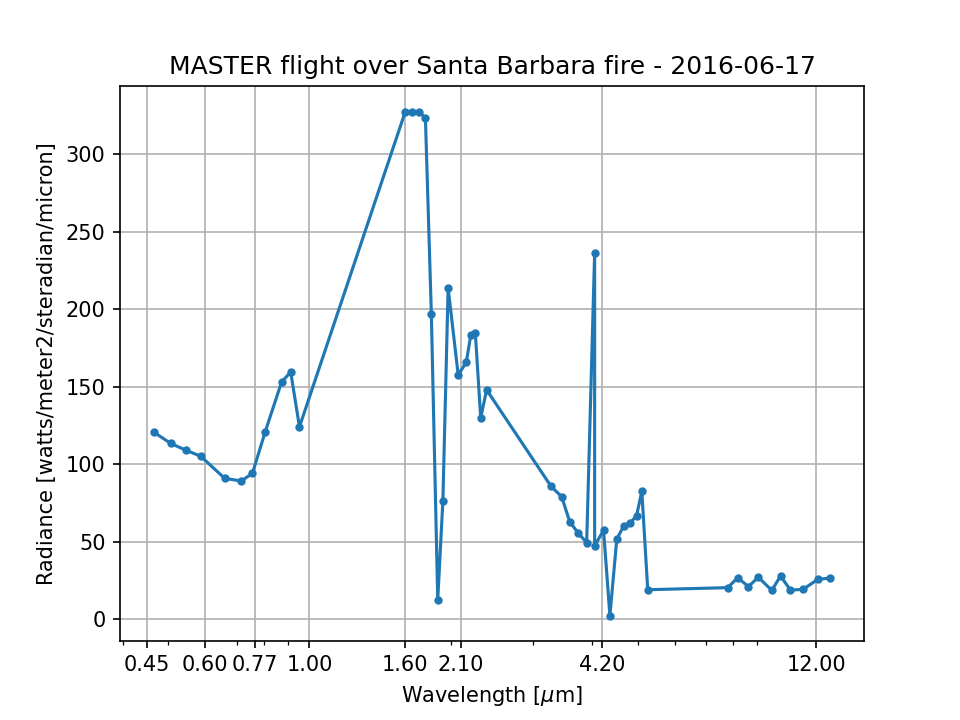

Text(0.5, 1.0, 'MASTER flight over Santa Barbara fire - 2016-06-17')

In [119]:
fig = plt.figure()

plt.plot(wvl[isort],rad[isort,i_pnt[0],i_pnt[1]],'.-')
plt.xscale('log')
plt.xticks([0.45,0.6,0.766,1.0,1.6,2.1,4.2,12.0])
#plt.set_scientific(False)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Radiance [{}]'.format(hdf2_dict['CalibratedData']['units']))
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(myLogFormat))
plt.title('MASTER flight over Santa Barbara fire - 2016-06-17')

<IPython.core.display.Javascript object>


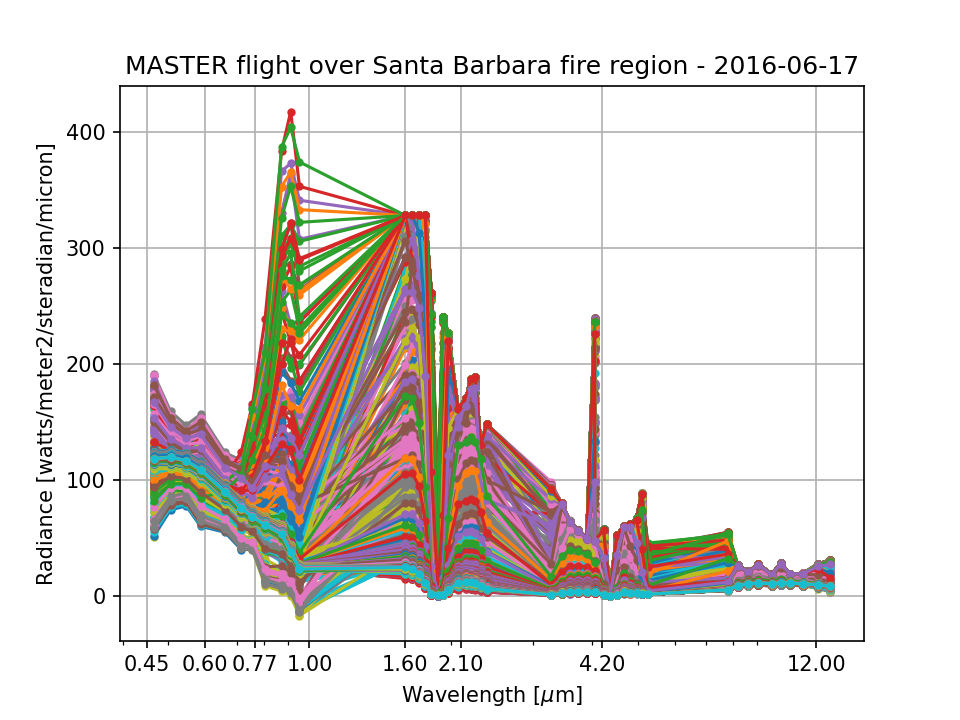

Text(0.5, 1.0, 'MASTER flight over Santa Barbara fire region - 2016-06-17')

In [130]:
fig = plt.figure()

plt.plot(wvl[isort],rad[:,i_rg[0],i_rg[1]][isort,:],'.-')
plt.xscale('log')
plt.xticks([0.45,0.6,0.766,1.0,1.6,2.1,4.2,12.0])
#plt.set_scientific(False)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Radiance [{}]'.format(hdf2_dict['CalibratedData']['units']))
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(myLogFormat))
plt.title('MASTER flight over Santa Barbara fire region - 2016-06-17')

In [134]:
SSI_str = '''2002.396
1894.1119
1804.2944
1732.247
1492.3435
1347.9291
1230.9342
1087.0133
954.6004
891.48627
817.17395
241.05524
225.26944
200.20187
175.09557
154.9544
136.57474
128.83186
120.36308
95.52779
79.23871
72.289474
67.94378
58.332928
55.806812
7.965488
17.595697
14.798581
12.533788
10.772283
9.262421
7.965488
6.5911274
5.816839
5.0909443
4.4618354
3.9004765
3.464939
3.0971522
2.7584012
0.6484663
0.0
0.42585844
0.34842965
0.27100083
0.22260782
0.18389341
0.14517902
0.10646461
0.08710741'''
SSI = np.array([float(s) for s in SSI_str.split('\n')])

In [137]:
refl =  np.array([rad[i,:,:]/s for i,s in enumerate(SSI)])

<ipython-input-137-7a8a56fee42c>:1: RuntimeWarning: divide by zero encountered in true_divide
  refl =  np.array([rad[i,:,:]/s for i,s in enumerate(SSI)])


<IPython.core.display.Javascript object>


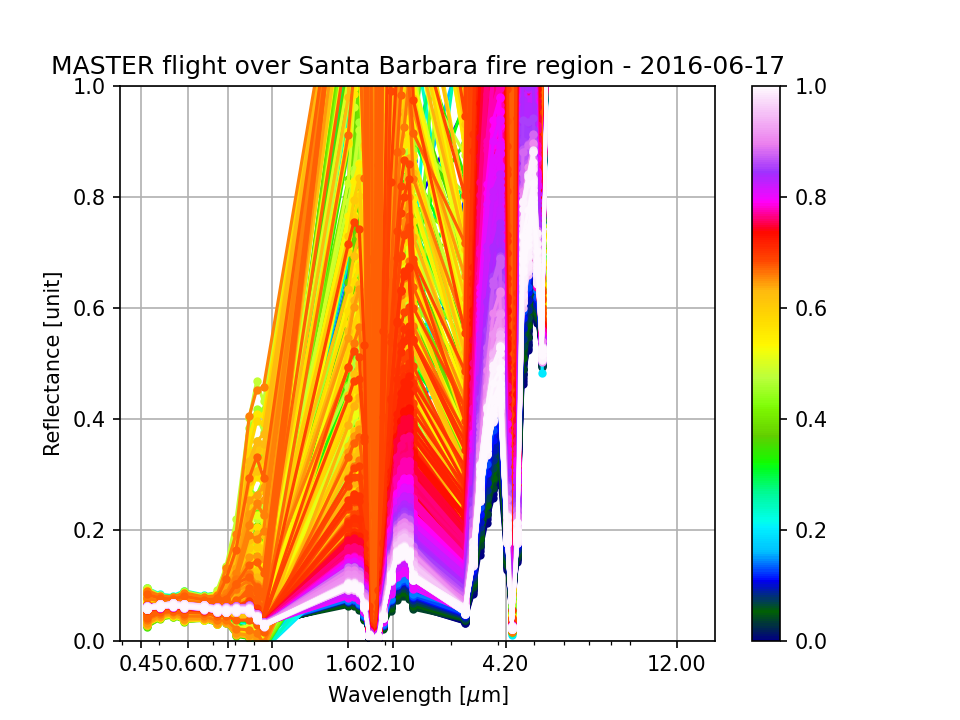

In [148]:
fig = plt.figure()
plt.gca().set_prop_cycle(color=[plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(i_rg[0]))])
plt.plot(wvl[isort],refl[:,i_rg[0],i_rg[1]][isort,:],'.-')

plt.xscale('log')
plt.xticks([0.45,0.6,0.766,1.0,1.6,2.1,4.2,12.0])
plt.ylim([0,1])
#plt.set_scientific(False)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Reflectance [unit]'.format(hdf2_dict['CalibratedData']['units']))
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(myLogFormat))
plt.title('MASTER flight over Santa Barbara fire region - 2016-06-17')
scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar)
scalarmap.set_array(np.linspace(0, 1, len(i_rg[0])))
plt.colorbar(scalarmap)

In [150]:
wvl[9]

0.912

<IPython.core.display.Javascript object>


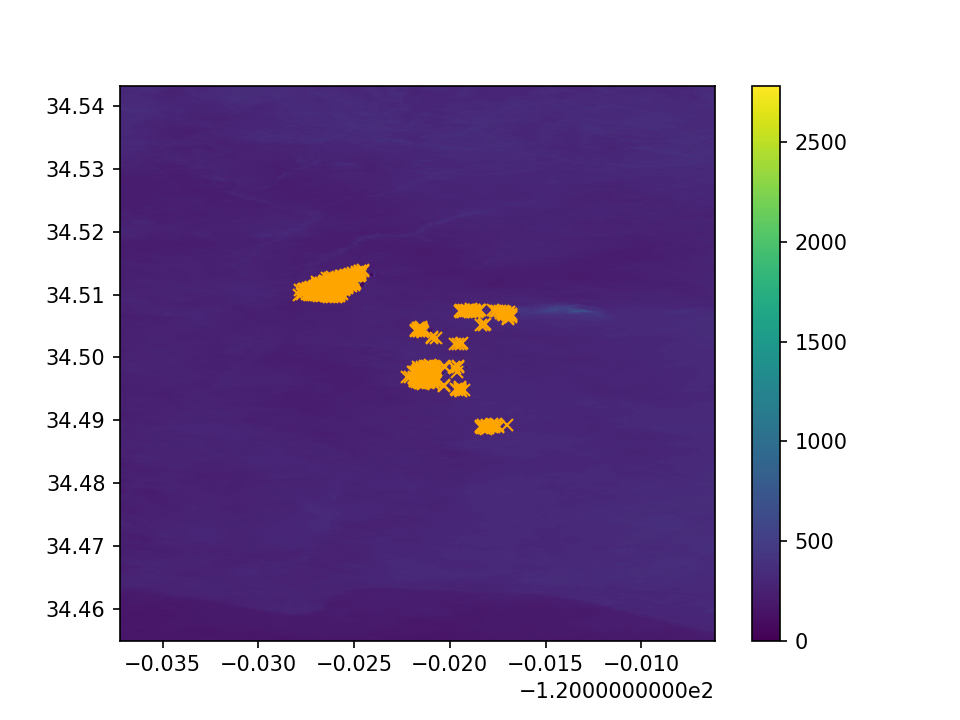

<ipython-input-166-ffbad0120a2e>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(hdf2['PixelLongitude'],hdf2['PixelLatitude'],hdf2['CalibratedData'][9,:,:])


In [166]:
fig = plt.figure()
plt.pcolor(hdf2['PixelLongitude'],hdf2['PixelLatitude'],hdf2['CalibratedData'][9,:,:])
plt.colorbar()
xup = np.where(rad[9,:,:]>150.0)
plt.plot(hdf2['PixelLongitude'][xup],hdf2['PixelLatitude'][xup],'xr')
xup2 = np.where(rad[11,:,:]>150.0)
plt.plot(hdf2['PixelLongitude'][xup2],hdf2['PixelLatitude'][xup2],'x',color='orange')


In [163]:
hdf2['PixelLongitude'][xup]

array([-120.08243576, -120.02511769, -120.02534462, -120.02516913,
       -120.02537577, -120.02520033, -120.02536027, -120.02550507,
       -120.02534508, -120.02552225, -120.02536228, -120.02572668,
       -120.02555171, -120.02587918, -120.02570445, -120.02552944,
       -120.02582636, -120.02602953, -120.02606648, -120.0262004 ,
       -120.02636507, -120.02619095, -120.02655369, -120.02638718,
       -120.02621311, -120.02644083, -120.02626686, -120.02609263,
       -120.02639508, -120.02622103, -120.02602065, -120.02630226,
       -120.02612794, -120.02595336, -120.02628608, -120.02611174,
       -120.02593713, -120.02632621, -120.02615192, -120.02640826,
       -120.02623409, -120.02605966, -120.02631295])

## Make planck balckbody calculations

From estimates of Wien's displacement
  
For fires at 800°C, 1073K, peak wavelength is 2700 nm  
For a peak wavelength of 2100 nm, temperature should be 1379K -> which is right in the ballpark for forest fire temperatures

In [152]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

In [153]:
wavelengths = np.arange(1e-9, 3e-6, 1e-9) 
intensity2100 = planck(wavelengths, 2100.)
intensity2700 = planck(wavelengths, 2700.)

<ipython-input-152-03a5a47af39d>:8: RuntimeWarning: overflow encountered in exp
  intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )


<IPython.core.display.Javascript object>


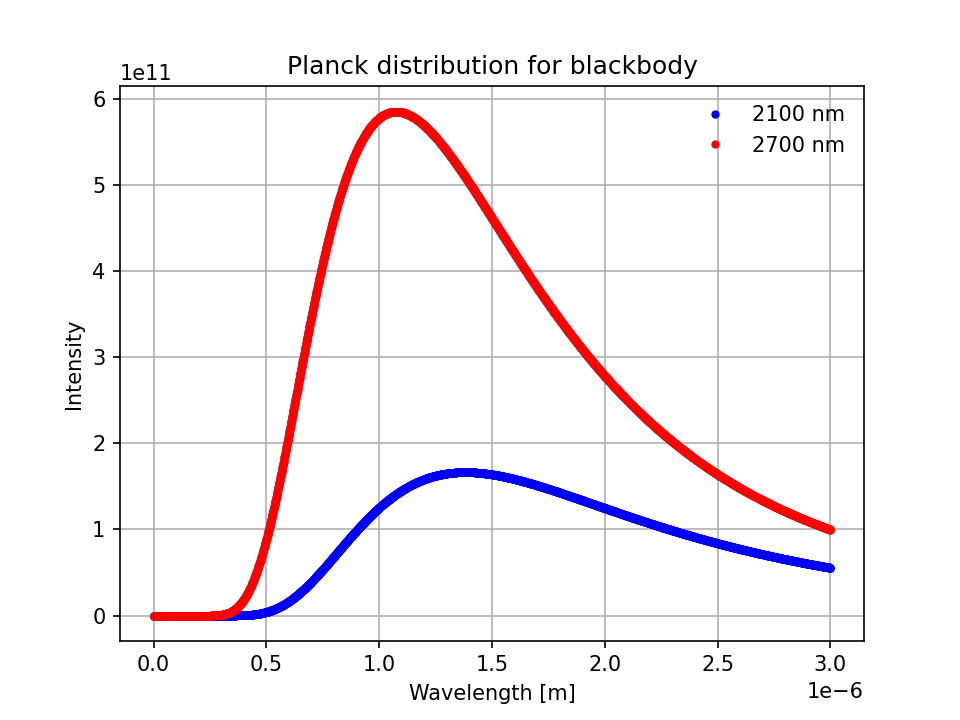

Text(0.5, 1.0, 'Planck distribution for blackbody')

In [157]:
plt.figure()
plt.plot(wavelengths,intensity2100,'.b',label='2100 nm')
plt.plot(wavelengths,intensity2700,'.r',label='2700 nm')
plt.legend(frameon=False)
plt.grid()
plt.xlabel('Wavelength [m]')
plt.ylabel('Intensity')
plt.title('Planck distribution for blackbody')

In [159]:
wvl[isort][9]

0.912

In [160]:
wvl[9]

0.912

In [170]:
from colorpy import ciexyz

ModuleNotFoundError: No module named 'colormodels'

In [168]:
help(colorpy)

Help on package colorpy:

NAME
    colorpy - __init__.py

DESCRIPTION
    ColorPy is a Python package to convert physical descriptions of light:
        spectra of light intensity vs. wavelength - into RGB colors that can
        be drawn on a computer screen.
        It provides a nice set of attractive plots that you can make of such
        spectra, and some other color related functions as well.
    
    License:
    
    Copyright (C) 2008 Mark Kness
    
    Author - Mark Kness - mkness@alumni.utexas.net
    
    This file is part of ColorPy.
    
    ColorPy is free software: you can redistribute it and/or modify
    it under the terms of the GNU Lesser General Public License as
    published by the Free Software Foundation, either version 3 of
    the License, or (at your option) any later version.
    
    ColorPy is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR

In [171]:
import colour

In [174]:
sd = colour.SpectralDistribution(rad[isort,i_pnt[0],i_pnt[1]])

In [206]:
sd.wavelengths = wvl[isort]*1000.0

In [207]:
sd

SpectralDistribution([[  4.66000000e+02,   1.20600005e+02],
                      [  5.06000000e+02,   1.13400005e+02],
                      [  5.46000000e+02,   1.08900004e+02],
                      [  5.86000000e+02,   1.05150004e+02],
                      [  6.60000000e+02,   9.07500036e+01],
                      [  7.16000000e+02,   8.91000036e+01],
                      [  7.56000000e+02,   9.40500038e+01],
                      [  8.04000000e+02,   1.20450005e+02],
                      [  8.72000000e+02,   1.53000006e+02],
                      [  9.12000000e+02,   1.59450006e+02],
                      [  9.52000000e+02,   1.24050005e+02],
                      [  1.60000000e+03,   3.27669993e+02],
                      [  1.65600000e+03,   3.27669993e+02],
                      [  1.71200000e+03,   3.27669993e+02],
                      [  1.76600000e+03,   3.23349993e+02],
                      [  1.81800000e+03,   1.97159996e+02],
                      [  1.87600000e+03,

In [212]:
sdi = sd.interpolate(colour.SpectralShape(start=465,end=870,interval=1))

In [214]:
xyz = colour.sd_to_XYZ(sdi)

<IPython.core.display.Javascript object>


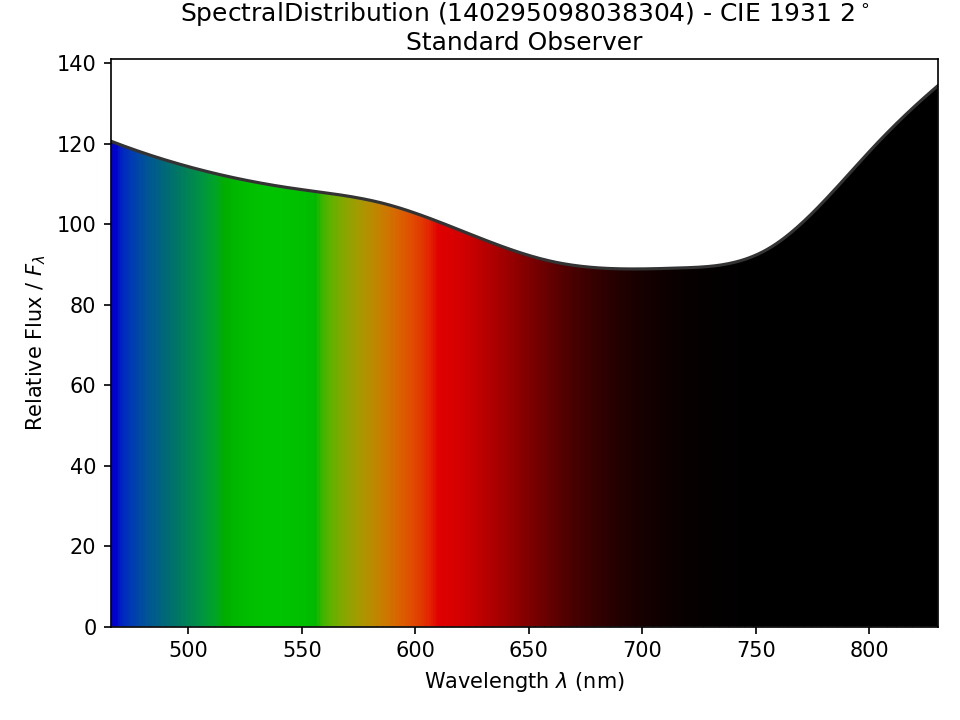

In [246]:
colour.plotting.plot_single_sd(
    sd,
    modulate_colours_with_sd_amplitude=True,
    y_label='Relative Flux / $F_\\lambda$')
plt.plot(wvl[isort],rad[isort,i_pnt[0],i_pnt[1]])

In [242]:
RGB = colour.XYZ_to_sRGB(xyz)

<IPython.core.display.Javascript object>


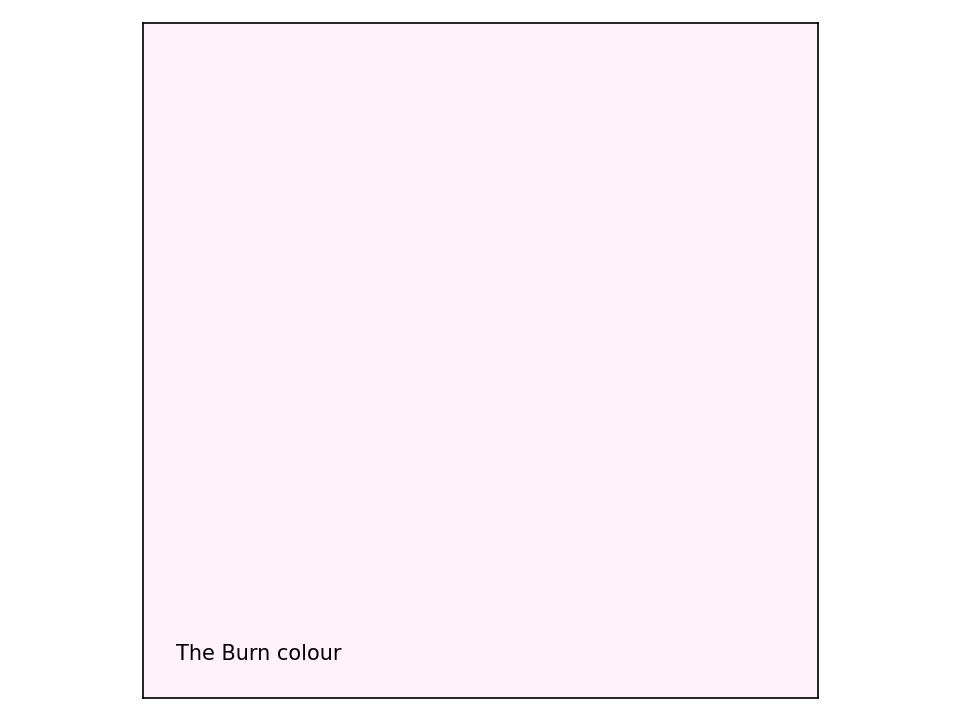

In [244]:
colour.plotting.plot_single_colour_swatch(
    colour.plotting.ColourSwatch(
        'The Burn colour', colour.utilities.normalise_maximum(RGB)),
    text_parameters={'size': 'x-large'});